# LTA DataMall API User Guide

Reference document url: https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

In [1]:
import os,sys
PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, PROJECT_PATH)

In [54]:
# Import api key from api_key.py's LTA_API_KEY
from conf.api_key import LTA_API_KEY
from typing import Union, Dict
import requests
import pandas as pd
from PIL import Image
import requests

In [3]:
def api_query(api_link: str,  agent_id: str, api_key: str, params_dict: Dict = None) -> Union[Dict,None]:
    """Function which executes query via an api link using a provided agent_id as an identifier to avoid rejection of query request

    Args:
        api_link (str): API Link which requests is to be made
        agent_id (str): Id used for request header
        api_key (str): API Key provided
        params_dict (Dict): Dictionary containing parameters to be passed in requests' get method

    Returns:
        Dictionary containing request content. None when exception are encountered.
    """
    req_headers = {"User-agent": agent_id, "AccountKey": api_key, "Content-Type": "application/json"}
    try:
        res = requests.get(url=api_link,
                           params=params_dict,
                           headers=req_headers,
                           timeout=5)
        # Raise if HTTPError occured
        res.raise_for_status()

        # Check the status code before extending the number of posts
        if res.status_code == 200:
            print(f"Request successful with status code {res.status_code}")
            the_json = res.json()
            return the_json
        else:
            print(f"Return unssucessful with status code {res.status_code}")
            return res.status_code

    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)
    return None

## List of 27 API URLs provided by LTA Datamall as of 04 Apr 2023 v5.5 Document
|API|URL|Update Frequency|Parameters|Response type|
|---|---|---|---|---|
|Bus Arrival|http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2|1min|*BusStopCode*;*ServiceNo*|Various Attributes|
|Bus Services|http://datamall2.mytransport.sg/ltaodataservice/BusServices|Ad hoc||Various Attributes|
|Bus Routes|http://datamall2.mytransport.sg/ltaodataservice/BusRoutes|Ad Hoc||Various Attributes|
|Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/BusStops|Ad Hoc||Various Attributes|
|Passenger Volume by Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/Bus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/ODTrain|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/Train|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Taxi Availability|http://datamall2.mytransport.sg/ltaodataservice/Taxi-Availability|1 min||Latitude/Longitude Attribute|
|Taxi Stands|http://datamall2.mytransport.sg/ltaodataservice/TaxiStands|Monthly||Various Attributes|
|Train Service Alerts|http://datamall2.mytransport.sg/ltaodataservice/TrainServiceAlerts|Ad hoc||Various Attributes|
|Carpark Availability(HDB/LTA/URA)|http://datamall2.mytransport.sg/ltaodataservice/CarParkAvailabilityv2|1min||Various Attribute|
|ERP Rates|http://datamall2.mytransport.sg/ltaodataservice/ERPRates|Ad hoc||Various Attribute|
|Estimated Travel Times|http://datamall2.mytransport.sg/ltaodataservice/EstTravelTimes|5mins||Various Attribute|
|Faulty Traffic Lights|http://datamall2.mytransport.sg/ltaodataservice/FaultyTrafficLights|2mins - whenever there are updates||Various Attributes|
|Road Openings|http://datamall2.mytransport.sg/ltaodataservice/RoadOpenings|24 hours -whenever there are updates||Various Attributes|
|Road Works|http://datamall2.mytransport.sg/ltaodataservice/RoadWorks|24 hours -whenever there are updates||Various Attributes|
|Traffic Images|http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2|1 to 5 mins||Link expiring in 5mins|
|Traffic Incidents|http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents|2 mins - whenever there are updates||Various Attributes|
|Traffic Speed Bands|http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands|5 mins||Various Attributes|
|VMS/EMAS|http://datamall2.mytransport.sg/ltaodataservice/VMS|2 mins||Various Attributes|
|Bicycle Parking|http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2|Monthly|*Lat*;*Long*;*Dist*=(Radius in km)|Various Attributes|
|Geospatial|http://datamall2.mytransport.sg/ltaodataservice/GeospatialWholeIsland|Ad hoc|*ID*=Name of Geospatial Layer|Link expiring in 5 mins|
|Facilities Maintenance|http://datamall2.mytransport.sg/ltaodataservice/FacilitiesMaintenace|Ad hoc|*StationCode* (eg. NS1)|Link expiring in 5 mins|
|Platform Crowd Density Real Time|http://datamall2.mytransport.sg/ltaodataservice/PCDForecast|24 hours|*TrainLine* (eg. EWL)|Various Attributes|
|Platform Crowd Density Forecast|http://datamall2.mytransport.sg/ltaodataservice/PCDRealTime|10 mins|*TrainLine* (eg. EWL)|Various Attributes|
|Traffic Flow|http://datamall2.mytransport.sg/ltaodataservice/TrafficFlow|Quarterly||Link expiring in 5mins|

Taxi Stands location

taxi_stand_url = "http://datamall2.mytransport.sg/ltaodataservice/TaxiStands"

Bus stop location

TrainStation PassengerVolume exploration

- Using Circle Line (CCL) as reference.

In [4]:
train_network_line_list = ["CCL",
                           "CEL",
                           "CGL",
                           "DTL",
                           "EWL",
                           "NEL",
                           "DTL",
                           "NEL",
                           "NSL",
                           "BPL",
                           "SLRT",
                           "PLRT"]

train_station_url = "http://datamall2.mytransport.sg/ltaodataservice/PV/Train"
train_station_api_response = api_query(api_link=train_station_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"TrainLine": "CCL"})

response_content = train_station_api_response.get("value")[0].get("Link").strip()
print(response_content)

Request successful with status code 200
https://ltafarecard.s3.ap-southeast-1.amazonaws.com/202312/transport_node_train_202312.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEA8aDmFwLXNvdXRoZWFzdC0xIkYwRAIgL1clOhft16STOUglVr3RJh6cntEUbvsZIeEhMztYM70CIEDy842wUt%2FZ%2FRhxpPndCfJCSEnS6cP8F3T8gPJ%2FSpshKssFCLj%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEQBBoMMzQwNjQ1MzgxMzA0IgxVHlBUmoYpb6QH2YcqnwXtufxDUdiJpjlkyjkEbOXgy37J5TpnjaWYbwrjVorelpWgpoEDhRGD%2FqwfrsmGbYZ%2F2B%2FCR2pAvhNmMUNY2IzIhaxmEm7nIf%2FiCpL7O38WMObgncIx5xXmRBTQtdJFyA4vxSKDRp4KofyGb92onJJ6XXfQ8ypiP6jh2w0vkx4jDSAhHJVZhSf%2Bz4yMZt96r9KgdK%2Bj6v8coNKm6R8Jr1DmkrugK04yvjPgHuRuuK%2FZ8NiAtz%2Bq2MoccY%2Bj2Mtq7gF8EFkfj1OnEyHz62M8xxrJa97%2FP5DLFpzhxn1%2BAekXnXNe6bH%2F0hgLP9S4BQAt%2FP5Lh%2BMc9Hy5%2Fi8IdKhB1%2FF32GzBlnlPU%2BTSUmrUSkd0XlHPQAlaGNFopLIVJUEsClJXy4Xz89rRfYzYjdRYA2u0vvYW1FMx58qWk4NB7IlduF5lw4BDhXiX54hJBpjvFU2m%2FCaFURneY3F%2FI96g3uAamEZH8DPlGvL2bszOWP8HRjPhq0QjfMhLUYrvou3iBdxtvOhM4LQ9Ys5my4W%2F8by%2Fv10EKvf11zBWMZ4OZSR6QUEMJ6fyJLabpfwqM1RpJ3v118bR

In [5]:
# Reading of the csv file compressed in provided link
df = pd.read_csv(response_content,  compression='zip', header=0, sep=',', )

In [6]:
df

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2023-12,WEEKDAY,11,TRAIN,NS7,20301,15305
1,2023-12,WEEKENDS/HOLIDAY,11,TRAIN,NS7,12854,13130
2,2023-12,WEEKENDS/HOLIDAY,16,TRAIN,SW4,1150,1188
3,2023-12,WEEKDAY,16,TRAIN,SW4,1706,2077
4,2023-12,WEEKDAY,10,TRAIN,CC5,2506,4630
...,...,...,...,...,...,...,...
6811,2023-12,WEEKENDS/HOLIDAY,6,TRAIN,DT23,459,485
6812,2023-12,WEEKDAY,7,TRAIN,NS27/CE2/TE20,918,6227
6813,2023-12,WEEKENDS/HOLIDAY,7,TRAIN,NS27/CE2/TE20,446,1100
6814,2023-12,WEEKDAY,12,TRAIN,SE5,2734,1822


Traffic Images API exploration and extraction of image

In [56]:
# TrafficImages
traffic_images_url = "http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2"
traffic_images_api_response = api_query(api_link=traffic_images_url, agent_id="test", api_key=LTA_API_KEY)
traffic_image_links = traffic_images_api_response.get("value")
traffic_image_links

Request successful with status code 200


[{'CameraID': '1001',
  'Latitude': 1.29531332,
  'Longitude': 103.871146,
  'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-17/17-35/1001_1733_20240117173510_985349.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEBEaDmFwLXNvdXRoZWFzdC0xIkcwRQIgY3DBBOnOKejp0cteg9IKVexxjmdpoRbmCYIIXajmIocCIQCFPwGhaXmYxVcF5PrVFAJ30MRYFKZQXlxZSMGl4nmF4CrKBQi6%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDM0MDY0NTM4MTMwNCIMtIys3dXuQM4WzsT%2BKp4FNC4Xo%2BXNwGaTBXsAwyMGDSHJSH%2Fy8Ks4WnJFui%2FRS1O77U58wgfat89c1DMPHoY%2FYyPsAaG7LbEGMn16ij9QgzBjBY1kMRms1VWVs3hQd8g2BTooUzUsHQ%2FFfbGJN93qN1IBNuaapUblXwchq23cwomaIzSlMJTv56VfTQ6Tmk%2BJY%2FXxfNR5G1OxIjiWFQNxqV4G%2BpvFSW%2BA2R7ufaBP9ZyDTLn7Sp3SlRjUhxy6gK0NtPKyYjGKfkqJvaUtUmtFGnitPZ309nF3g6vWGWoFQpLX%2F4XSqfi5ZpNRka1r3o6eRozNSiaQjaX9b7pPJgzsnDQ6rf2MUmxTtD2E%2BYK7XU%2BIlxbD2R07q1j3wP72JJ1TtzYnGhAeqw2NXwhGJG91zV6VodOzXUH0U%2BsBgd9LpsLo6XfM536SpGPbWv9FTrIZSAz1ycStQWmO%2Fp0tpyQddTjttJgZ0mqMDGmfPnwFoLfZ0MpDLAHeD2mMDiga7xWxkhlyIZmGBfoXTqo8N%2BkvYNRHQJT7

In [58]:
# Filter for coordinates which are within a specified radius of test point
# Importing the geodesic module from the library 
from geopy.distance import geodesic

radius = 0.5 #in km
test_point = tuple([1.2953,103.87])

# FIltering by list
surrounding_traffic_images = [traffic_image_link for traffic_image_link in traffic_image_links if geodesic(test_point, tuple([traffic_image_link["Latitude"], traffic_image_link["Longitude"]])).kilometers
< radius][0]

img_link_to_retrieve = surrounding_traffic_images["ImageLink"]
img_link_to_retrieve

'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-17/17-35/1001_1733_20240117173510_985349.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEBEaDmFwLXNvdXRoZWFzdC0xIkcwRQIgY3DBBOnOKejp0cteg9IKVexxjmdpoRbmCYIIXajmIocCIQCFPwGhaXmYxVcF5PrVFAJ30MRYFKZQXlxZSMGl4nmF4CrKBQi6%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDM0MDY0NTM4MTMwNCIMtIys3dXuQM4WzsT%2BKp4FNC4Xo%2BXNwGaTBXsAwyMGDSHJSH%2Fy8Ks4WnJFui%2FRS1O77U58wgfat89c1DMPHoY%2FYyPsAaG7LbEGMn16ij9QgzBjBY1kMRms1VWVs3hQd8g2BTooUzUsHQ%2FFfbGJN93qN1IBNuaapUblXwchq23cwomaIzSlMJTv56VfTQ6Tmk%2BJY%2FXxfNR5G1OxIjiWFQNxqV4G%2BpvFSW%2BA2R7ufaBP9ZyDTLn7Sp3SlRjUhxy6gK0NtPKyYjGKfkqJvaUtUmtFGnitPZ309nF3g6vWGWoFQpLX%2F4XSqfi5ZpNRka1r3o6eRozNSiaQjaX9b7pPJgzsnDQ6rf2MUmxTtD2E%2BYK7XU%2BIlxbD2R07q1j3wP72JJ1TtzYnGhAeqw2NXwhGJG91zV6VodOzXUH0U%2BsBgd9LpsLo6XfM536SpGPbWv9FTrIZSAz1ycStQWmO%2Fp0tpyQddTjttJgZ0mqMDGmfPnwFoLfZ0MpDLAHeD2mMDiga7xWxkhlyIZmGBfoXTqo8N%2BkvYNRHQJT7baExAVn8JqNpcQ0ckx9YNNQ%2F13ICtdsw2sBtkayZn2LH7y0qiIH2r%2Fh%2BLXEMXofXxBWSMGVpqRe85EEkAO%2

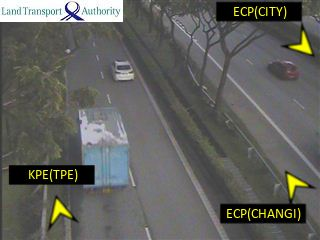

In [64]:
from IPython.display import display # For notebook purposes.
response = requests.get(img_link_to_retrieve, stream=True)
img = Image.open(response.raw)
display(img)

In [61]:
# TrafficFlow
traffic_flow_url = "http://datamall2.mytransport.sg/ltaodataservice/TrafficFlow"
traffic_flow_api_response = api_query(api_link=traffic_flow_url, agent_id="test", api_key=LTA_API_KEY)

response_content = traffic_flow_api_response.get("value")[0].get("Link")
response_content

Request successful with status code 200


'https://dmprod-datasets.s3.ap-southeast-1.amazonaws.com/traffic-flow/data/trafficflow.json?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEBEaDmFwLXNvdXRoZWFzdC0xIkcwRQIhAPpfPI68UE5k%2FmmbKIpXCfMfwMTmmZfU6%2FkZ1trEzO5XAiAg5ZDhi8XCBtLe8%2BmqtlRTBzvDMhZWuQtSze8MT%2BUkkCrLBQi6%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAQaDDM0MDY0NTM4MTMwNCIM3meJsmyoB4sKzBiMKp8FxOtIH79jc4%2BNtAEb3wkzhvil3zmpZBOopChbcxmTFBeQ1BYsXNcTTclmI3%2FV88WtUzuL6FOalhgt5J8%2FiaTrzWUds46lFxlEhPYQ6%2BKPYYlJwQ2fvVu6LLpff7W0Fboj3WIVTFwTrHKQ0OThrM8ml44m5sZLKf5OQE8Z50qhPLpqhgaL8Czklll8nzvyuxuQZU1L0Muw99HsRppfBwLc%2B9e2gv1XSCclRcaA5dD2XsXtmZmQsJYY1GkhsA%2BDbrODqfAh0hyIT%2FSPy%2BJ9F0q3Nsdp4BeFznaSH5EqdITHBsdImqVTLasLXsIY%2BS4p%2F6Wnn%2Bx5i6MczTTY2Yfn2rak3q9cGc1ldZNVcwjhbDZavlF4WpXowY3Ti%2BMYxMu3DyRACwhmadMJloKXRlsgO9M%2BgbQYBnILXy0unw4OxYhyoOC4Uhd9UOskbnNAOG3uy5HBDrkpdVniutC7mAOFvCECDZ0duvXA%2BiM5KgAJHFFh4ZOqDxKzhCK0LBg36DqLggQ%2FGMkL4fokyQGPjpPXtPPKgyxveWzYppIcjSMqipeIP6UA%2FZ2tfyrrhflOY6%2Fq3FAHLKrmIzmXjNFRBifNrdfzXeicnLmM9KIhTBN7U3FROEMYSEE%2

In [15]:
# Bicycle Parking

bicycle_parking_url = "http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2"

bicycle_parking_api_response = api_query(api_link=bicycle_parking_url, agent_id="test", api_key=LTA_API_KEY)
print(bicycle_parking_url)
response_content = bicycle_parking_api_response.get("value")[0].get("Link")
response_content

404 Client Error: Not found. Verify that the request URL/Parameters are spelled correctly for url: http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2
http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2


AttributeError: 'NoneType' object has no attribute 'get'

In [6]:
## Platform crowd density real time

platform_crowd_density = "http://datamall2.mytransport.sg/ltaodataservice/PCDRealTime"
platform_crowd_density_real_time_data = api_query(api_link=platform_crowd_density, agent_id="test", api_key=LTA_API_KEY)
platform_crowd_density_real_time_data

404 Client Error: Not Found for url: http://datamall2.mytransport.sg/ltaodataservice/PCDRealTime
